# ***Dataset de producciones de Disney y recomendaciones finales***

Github del proyecto: https://github.com/fatimafer/film_recommendation

Este conjunto de datos se creó para listar todos los programas y películas disponibles en Disney+. Se recopiló en JustWatch en marzo de 2023 y contiene datos de Estados Unidos.

------------------------------------------------------------------------------------- **"titles.csv"** -----------------------------------------------------------------------------------------
* id: The title ID on JustWatch.
* title: The name of the title.
* show_type: TV show or movie.
* description: A brief description.
* release_year: The release year.
* age_certification: The age certification.
* runtime: The length of the episode (SHOW) or movie.
* genres: A list of genres.
* production_countries: A list of countries that - produced the title.
* seasons: Number of seasons if it's a SHOW.
* imdb_id: The title ID on IMDB.
* imdb_score: Score on IMDB.
* imdb_votes: Votes on IMDB.
* tmdb_popularity: Popularity on TMDB.
* tmdb_score: Score on TMDB.

Este archivo contiene los datos de los títulos cada película, serie o show de la plataforma Disney +

------------------------------------------------------------------------------------------ **"credits.csv"** ---------------------------------------------------------------------------------------------

*   person_ID: The person ID on JustWatch.
* id: The title ID on JustWatch.
* name: The actor or director's name.
* character_name: The character name.
* role: ACTOR or DIRECTOR.

Este archivo contiene los datos del elenco asociados a cada serie o show de la plataforma Disney +


# ***Importing Libraries***

In [1]:
#!pip install tensorflow

In [2]:
#!pip install langdetect

In [3]:
#!pip install wordcloud

In [4]:
#!pip install pandas

In [5]:
#!pip install scikit-learn

In [6]:
#!pip install seaborn

In [7]:
#!pip install matplotlib pydot graphviz

In [8]:
#!pip install pytest

In [9]:
#leer y manipular el dataset
import os

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import pandas as pd
import numpy as np

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# Preproceso de datos
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Entrenamiento Modelo
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf

## Importar módulos necesarios para el filtrado colaborativo
from tensorflow.keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


# ***Lectura del conjunto de datos***
fuente: https://www.kaggle.com/datasets/dgoenrique/disney-movies-and-tv-shows

In [10]:
df_disney=pd.read_csv('Datasets/titles.csv')
print('Shape of df_disney:', df_disney.shape)
pd.set_option('Display.max_columns', None)
df_disney.head()

Shape of df_disney: (1854, 15)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],NaN,tt0039628,7.9,50969.0,23.515,7.388
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],NaN,tt0041094,6.9,16502.0,16.194,6.500
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],NaN,tt0042332,7.3,164292.0,93.547,7.035
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,64,"['animation', 'drama', 'family', 'fantasy']",['US'],NaN,tt0033563,7.2,135045.0,54.265,6.999
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,G,119,"['animation', 'family', 'fantasy', 'music']",['US'],NaN,tt0032455,7.7,98764.0,43.609,7.382


In [11]:
df_credits=pd.read_csv('Datasets/credits.csv')
print('Shape of df_credits', df_credits.shape)
pd.set_option('display.max_columns', None)
df_credits.head()

Shape of df_credits (30689, 5)


,person_id,id,name,character,role
0,35549,tm89464,Maureen O'Hara,Doris Walker,ACTOR
1,57832,tm89464,John Payne,Fred Gailey,ACTOR
2,57833,tm89464,Edmund Gwenn,Kris Kringle,ACTOR
3,25096,tm89464,Natalie Wood,Susan Walker,ACTOR
4,27185,tm89464,Porter Hall,Granville Sawyer,ACTOR


# *Data Exploration*

Comenzamos buscando valores nulos para limpiar el DataSet

In [12]:
df_disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1854 non-null   object 
 1   title                 1854 non-null   object 
 2   type                  1854 non-null   object 
 3   description           1845 non-null   object 
 4   release_year          1854 non-null   int64  
 5   age_certification     1403 non-null   object 
 6   runtime               1854 non-null   int64  
 7   genres                1854 non-null   object 
 8   production_countries  1854 non-null   object 
 9   seasons               540 non-null    float64
 10  imdb_id               1376 non-null   object 
 11  imdb_score            1339 non-null   float64
 12  imdb_votes            1328 non-null   float64
 13  tmdb_popularity       1839 non-null   float64
 14  tmdb_score            1708 non-null   float64
dtypes: float64(5), int64(

In [13]:
df_disney.duplicated().sum()

np.int64(0)

Como solo nos interesan aquellos valores que tengan una descripción del argumento eliminiamos aquellos que no la tengan

In [14]:
df_disney.dropna(subset=['description'], inplace=True)
print('Shape of df_disney:', df_disney.shape)

Shape of df_disney: (1845, 15)


Le añadimos la media de su puntuación en TMDb y IMDb
Para ello, si la puntuación en alguna de las plataformas es nula, se mantiene la puntuación de la otra plataforma

In [15]:
df_disney['Rank'] = np.where((df_disney['imdb_score'].isna()),
                                df_disney['tmdb_score'],
                                ((df_disney['imdb_score'] + df_disney['tmdb_score'])/2))

df_disney['Rank'] = np.where((df_disney['tmdb_score'].isna()),
                                df_disney['imdb_score'],
                                df_disney['Rank'])

In [16]:
disney_sorted_rank = df_disney.sort_values('Rank', ascending = False)
disney_sorted_rank.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Rank
1826,tm1253949,Dancing With The Stars: The Pros' Most Memorab...,MOVIE,“Dancing with the Stars” is the hit series hos...,2022,NaN,55,['documentation'],"['US', 'AU']",NaN,NaN,NaN,NaN,0.622,10.0,10.0
1845,tm1314337,Miley Cyrus – Endless Summer Vacation (Backyar...,MOVIE,"Miley Cyrus takes the stage in this must-see, ...",2023,PG-13,42,"['music', 'documentation']",['US'],NaN,tt27001634,NaN,NaN,10.543,10.0,10.0
840,tm895746,America's Greatest Animals,MOVIE,America's Greatest Animals takes us across Nor...,2012,NaN,96,['documentation'],['US'],NaN,NaN,NaN,NaN,1.813,10.0,10.0
843,tm1104511,Return of the Clouded Leopards,MOVIE,Two rare 6-week-old clouded leopard cubs are g...,2012,PG,45,['documentation'],[],NaN,NaN,NaN,NaN,0.663,10.0,10.0
1093,tm1114332,Generation YouTube,MOVIE,As YouTube turns ten we chart the history of t...,2015,NaN,44,['documentation'],['US'],NaN,NaN,NaN,NaN,0.626,10.0,10.0
201,tm918170,The Pre-Opening Report from Disneyland,MOVIE,With the grand opening of Disneyland just a ma...,1955,NaN,55,"['history', 'family', 'documentation']",[],NaN,NaN,NaN,NaN,0.678,10.0,10.0
187,tm895685,The Story of the Animated Drawing,MOVIE,Walt Disney discusses the history of animation...,1955,G,49,['documentation'],['US'],NaN,NaN,NaN,NaN,1.513,10.0,10.0
1349,ts269854,Disney Parks Sunrise Series,SHOW,"At daybreak, the first rays of sunlight gleam ...",2020,TV-G,59,[],['US'],1.0,NaN,NaN,NaN,1.400,10.0,10.0
1506,ts251052,Disney Junior Music Lullabies,SHOW,"Mickey Mouse, Minnie Mouse, Doc McStuffins, Fa...",2019,TV-Y,1,['animation'],['US'],1.0,NaN,NaN,NaN,0.600,10.0,10.0
1360,tm973637,From Our Family to Yours,MOVIE,"While times change and people grow, beloved fa...",2020,NaN,3,"['animation', 'drama']",['US'],NaN,NaN,NaN,NaN,1.400,10.0,10.0


Como vemos, hay resultados bastante extraños. Hay muchas producciones poco populares en los primeros puestos como Dancing with The Stars (versión americana de mira quien baila).
Por ello vamos a ponderar la puntuación de IMDb y TMDb por sus votos y popularidad respectivamente

In [17]:
total_imdb_votes = df_disney['imdb_votes'].sum()
total_tmdb_poularity = df_disney['tmdb_popularity'].sum()

df_disney['imdb_ponderated'] = (df_disney['imdb_score'] * df_disney['imdb_votes'] / total_imdb_votes)*100
df_disney['tmdb_ponderated'] = (df_disney['tmdb_score'] * df_disney['tmdb_popularity'] / total_tmdb_poularity)*100

df_disney['Rank_ponderated'] = np.where((df_disney['imdb_ponderated'].isna()),
                                df_disney['tmdb_ponderated'],
                                ((df_disney['imdb_ponderated'] + df_disney['tmdb_ponderated'])/2))

df_disney['Rank_ponderated'] = np.where((df_disney['tmdb_ponderated'].isna()),
                                df_disney['imdb_ponderated'],
                                df_disney['Rank_ponderated'])


In [18]:
disney_sorted_rank_2 = df_disney.sort_values('Rank_ponderated', ascending = False)
disney_sorted_rank_2.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Rank,imdb_ponderated,tmdb_ponderated,Rank_ponderated
1513,tm465131,Black Panther: Wakanda Forever,MOVIE,"Queen Ramonda, Shuri, M’Baku, Okoye and the Do...",2022,PG-13,162,"['action', 'scifi', 'drama', 'fantasy', 'thril...",['US'],NaN,tt10954592,6.8,235189.0,2159.377,7.337,7.0685,1.729887,33.465139,17.597513
1253,ts84392,The Mandalorian,SHOW,"After the fall of the Galactic Empire, lawless...",2019,TV-14,40,"['scifi', 'action', 'drama', 'fantasy']",['US'],3.0,tt8111088,8.7,506303.0,1607.738,8.478,8.5890,4.764545,28.790839,16.777692
423,tm135853,Avatar,MOVIE,"In the 22nd century, a paraplegic Marine is di...",2009,PG-13,162,"['action', 'fantasy', 'scifi']","['US', 'GB']",NaN,tt0499549,7.9,1328275.0,491.485,7.567,7.7335,11.350286,7.855605,9.602945
1622,tm1284655,The Simpsons Meet the Bocellis in Feliz Navidad,MOVIE,"This Christmas, Homer surprises Marge with the...",2022,PG,4,['comedy'],['US'],NaN,tt24082346,5.6,NaN,709.970,5.167,5.3835,NaN,7.748615,7.748615
1111,tm591,Avengers: Infinity War,MOVIE,As the Avengers and their allies have continue...,2018,PG-13,149,"['action', 'scifi', 'fantasy']",['US'],NaN,tt4154756,8.4,1101488.0,278.757,8.300,8.3500,10.008080,4.887081,7.447580
749,tm64957,The Avengers,MOVIE,When an unexpected enemy emerges and threatens...,2012,PG-13,143,"['scifi', 'action']",['US'],NaN,tt0848228,8.0,1403757.0,167.211,7.707,7.8535,12.147128,2.722048,7.434588
85,tm1,Star Wars,MOVIE,Princess Leia is captured and held hostage by ...,1977,PG,121,"['action', 'scifi', 'fantasy']",['US'],NaN,tt0076759,8.6,1378285.0,81.289,8.207,8.4035,12.821215,1.409165,7.115190
203,ts20711,The Simpsons,SHOW,The satiric adventures of a working-class fami...,1989,TV-MA,27,"['animation', 'comedy']",['US'],36.0,tt0096697,8.7,413320.0,538.281,7.989,8.3445,3.889532,9.083372,6.486452
87,tm2,The Empire Strikes Back,MOVIE,"The epic saga continues as Luke Skywalker, in ...",1980,PG,124,"['action', 'scifi', 'fantasy']",['US'],NaN,tt0080684,8.7,1305888.0,28.328,8.393,8.5465,12.289010,0.502202,6.395606
1255,tm1855,Avengers: Endgame,MOVIE,After the devastating events of Avengers: Infi...,2019,PG-13,181,"['scifi', 'action', 'drama', 'fantasy']",['US'],NaN,tt4154796,8.4,1016115.0,201.420,8.268,8.3340,9.232384,3.517618,6.375001


In [19]:
df_disney = df_disney.sort_values('Rank_ponderated', ascending= False).reset_index(drop = True)
df_disney['Rank_Number'] = range(1, len(df_disney) + 1)
df_disney = df_disney.loc[:]
df_disney.head(20)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Rank,imdb_ponderated,tmdb_ponderated,Rank_ponderated,Rank_Number
0,tm465131,Black Panther: Wakanda Forever,MOVIE,"Queen Ramonda, Shuri, M’Baku, Okoye and the Do...",2022,PG-13,162,"['action', 'scifi', 'drama', 'fantasy', 'thril...",['US'],NaN,tt10954592,6.8,235189.0,2159.377,7.337,7.0685,1.729887,33.465139,17.597513,1
1,ts84392,The Mandalorian,SHOW,"After the fall of the Galactic Empire, lawless...",2019,TV-14,40,"['scifi', 'action', 'drama', 'fantasy']",['US'],3.0,tt8111088,8.7,506303.0,1607.738,8.478,8.5890,4.764545,28.790839,16.777692,2
2,tm135853,Avatar,MOVIE,"In the 22nd century, a paraplegic Marine is di...",2009,PG-13,162,"['action', 'fantasy', 'scifi']","['US', 'GB']",NaN,tt0499549,7.9,1328275.0,491.485,7.567,7.7335,11.350286,7.855605,9.602945,3
3,tm1284655,The Simpsons Meet the Bocellis in Feliz Navidad,MOVIE,"This Christmas, Homer surprises Marge with the...",2022,PG,4,['comedy'],['US'],NaN,tt24082346,5.6,NaN,709.970,5.167,5.3835,NaN,7.748615,7.748615,4
4,tm591,Avengers: Infinity War,MOVIE,As the Avengers and their allies have continue...,2018,PG-13,149,"['action', 'scifi', 'fantasy']",['US'],NaN,tt4154756,8.4,1101488.0,278.757,8.300,8.3500,10.008080,4.887081,7.447580,5
5,tm64957,The Avengers,MOVIE,When an unexpected enemy emerges and threatens...,2012,PG-13,143,"['scifi', 'action']",['US'],NaN,tt0848228,8.0,1403757.0,167.211,7.707,7.8535,12.147128,2.722048,7.434588,6
6,tm1,Star Wars,MOVIE,Princess Leia is captured and held hostage by ...,1977,PG,121,"['action', 'scifi', 'fantasy']",['US'],NaN,tt0076759,8.6,1378285.0,81.289,8.207,8.4035,12.821215,1.409165,7.115190,7
7,ts20711,The Simpsons,SHOW,The satiric adventures of a working-class fami...,1989,TV-MA,27,"['animation', 'comedy']",['US'],36.0,tt0096697,8.7,413320.0,538.281,7.989,8.3445,3.889532,9.083372,6.486452,8
8,tm2,The Empire Strikes Back,MOVIE,"The epic saga continues as Luke Skywalker, in ...",1980,PG,124,"['action', 'scifi', 'fantasy']",['US'],NaN,tt0080684,8.7,1305888.0,28.328,8.393,8.5465,12.289010,0.502202,6.395606,9
9,tm1855,Avengers: Endgame,MOVIE,After the devastating events of Avengers: Infi...,2019,PG-13,181,"['scifi', 'action', 'drama', 'fantasy']",['US'],NaN,tt4154796,8.4,1016115.0,201.420,8.268,8.3340,9.232384,3.517618,6.375001,10


In [20]:
Type_Counts = df_disney['type'].value_counts()
Type_Counts.head()

type
MOVIE    1309
SHOW      536
Name: count, dtype: int64

Como podemos ver todos los registros del dataset o bien son películas u otro tipo de producciones (series, documentales, shows, etc..)
Vamos a realizar ahora un recuento por géneros. Como cáda película tiene varios géneros, crearemos otro df.

In [21]:
df_disney_expanded = df_disney.copy()

#Limpiamos las comillas y los corchetes de la columna genres
df_disney_expanded['genres'] = df_disney_expanded['genres'].str[1:].str[:-1]
df_disney_expanded['genres'] = df_disney_expanded['genres'].apply(lambda x: x.replace("'",""))

#Creamos una columna para cada género de la película separando por comas
genres_expanded= df_disney_expanded['genres'].str.get_dummies(sep=", ")

df_disney_expanded = df_disney_expanded.join(genres_expanded)
df_disney_expanded.drop(labels='genres', axis=1, inplace=True)

In [22]:
#Hacemos un unpivot
df_genres = df_disney_expanded.melt(id_vars=['id','title','type','description','release_year','age_certification','runtime','production_countries','seasons','imdb_id','imdb_score', 'imdb_votes','tmdb_popularity','tmdb_score','Rank','imdb_ponderated',
                                    'tmdb_ponderated','Rank_ponderated','Rank_Number'], var_name='genre', value_name='exists')


#Eliminamos aquellos tipos de géneros que sean nulos
df_genres = df_genres[df_genres['exists'] == 1]
df_genres.drop('exists', axis= 1, inplace=True)


In [23]:
Genre_Counts = df_genres['genre'].value_counts()
Genre_Counts

genre
family           836
comedy           750
animation        530
documentation    516
drama            415
fantasy          414
action           375
scifi            304
romance          155
music            123
reality          101
thriller          73
sport             72
crime             64
history           52
european          40
horror            37
western           26
war                9
Name: count, dtype: int64

También podríamos averiguar si, hay producciones con una puntuación baja por ser muy antiguas

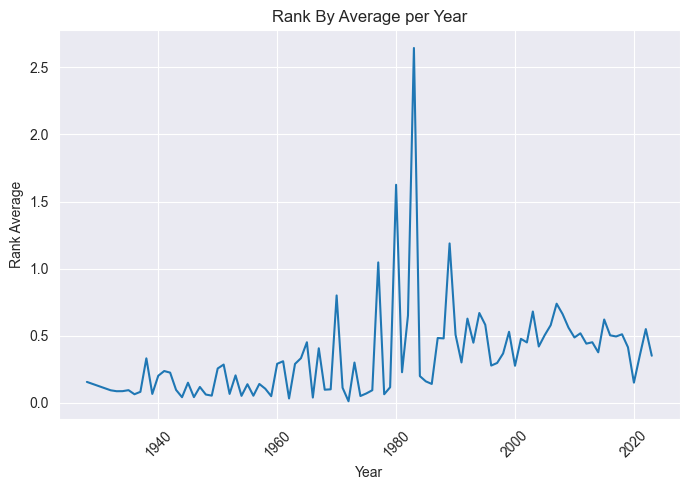

In [24]:
disney_year_helper = disney_sorted_rank_2.copy()
score_by_year = disney_year_helper.groupby('release_year')['Rank_ponderated'].mean()
fig, ax = plt.subplots(figsize=(7, 5))
score_by_year.plot(kind='line', ax=ax)

ax.set_xlabel('Year')
ax.set_ylabel('Rank Average')
ax.set_title('Rank By Average per Year')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podríamos borrar las producciones más antiguas pero perderíamos datos

**Análisis exploratorio simple**

Ahora pasaremos a realizar un análisis simple para encontrar datos interesantes dentro de este conjunto de datos

**Análisis de directores**

Observando nuestro conjunto de datos nos daremos cuenta que una producción puede tener uno o varios géneros y uno o varios países de producción.
Así que para un mejor análisis desestructuraremos esas columnas.

In [25]:
df_disney_expanded['production_countries'] = df_disney_expanded['production_countries'].str[1:].str[:-1]
df_disney_expanded['production_countries'] = df_disney_expanded['production_countries'].apply(lambda x: x.replace("'",""))

In [26]:
def split_countries(x):
    return x.split(", ")
df_disney_expanded["production_countries"] = df_disney_expanded["production_countries"].apply(split_countries)
df_disney_expanded = df_disney_expanded.explode('production_countries').reset_index(drop=True)

df_disney_expanded.head()

,id,title,type,description,release_year,age_certification,runtime,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Rank,imdb_ponderated,tmdb_ponderated,Rank_ponderated,Rank_Number,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western
0,tm465131,Black Panther: Wakanda Forever,MOVIE,"Queen Ramonda, Shuri, M’Baku, Okoye and the Do...",2022,PG-13,162,US,NaN,tt10954592,6.8,235189.0,2159.377,7.337,7.0685,1.729887,33.465139,17.597513,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
1,ts84392,The Mandalorian,SHOW,"After the fall of the Galactic Empire, lawless...",2019,TV-14,40,US,3.0,tt8111088,8.7,506303.0,1607.738,8.478,8.5890,4.764545,28.790839,16.777692,2,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
2,tm135853,Avatar,MOVIE,"In the 22nd century, a paraplegic Marine is di...",2009,PG-13,162,US,NaN,tt0499549,7.9,1328275.0,491.485,7.567,7.7335,11.350286,7.855605,9.602945,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,tm135853,Avatar,MOVIE,"In the 22nd century, a paraplegic Marine is di...",2009,PG-13,162,GB,NaN,tt0499549,7.9,1328275.0,491.485,7.567,7.7335,11.350286,7.855605,9.602945,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,tm1284655,The Simpsons Meet the Bocellis in Feliz Navidad,MOVIE,"This Christmas, Homer surprises Marge with the...",2022,PG,4,US,NaN,tt24082346,5.6,NaN,709.970,5.167,5.3835,NaN,7.748615,7.748615,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Los directores involucrados en lass 200 mejores producciones vs. directores involucrados en las 200 últimas producciones

In [27]:
df_directors = df_credits[df_credits.role == 'DIRECTOR']
df_directors.drop(labels=['character','role'], axis=1, inplace=True)

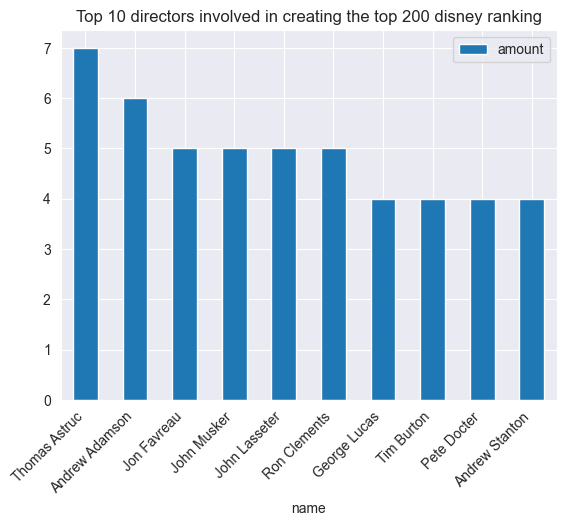

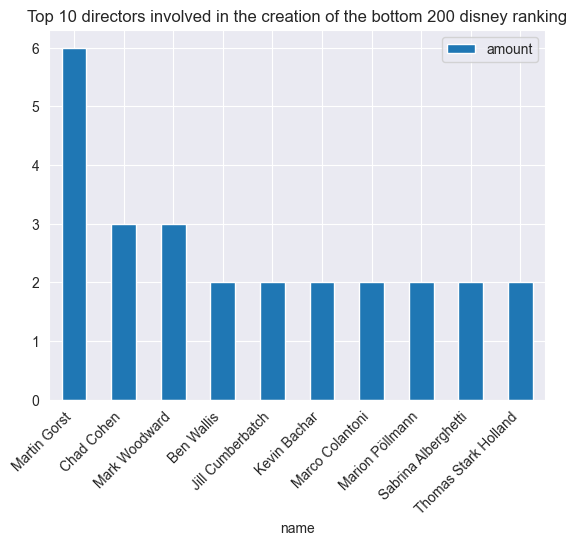

In [28]:
muestra_top = df_disney_expanded.head(200)
muestra_top = muestra_top.merge(df_directors, on='id', how='left')

top_director = (
    muestra_top.groupby('name').title.count()
        .reset_index(name='amount')
        .sort_values('amount', ascending = False)
        .head(10)
)

muestra_bottom = (
    df_disney_expanded
        .sort_values('Rank_Number', ascending = False)
        .head(200)
)
muestra_bottom = muestra_bottom.merge(df_directors, on='id', how='left')
bottom_studios = (
    muestra_bottom.groupby('name').title.count()
        .reset_index(name='amount')
        .sort_values('amount', ascending = False)
        .head(10)
)


top_director.plot(kind = 'bar', x = 'name', title='Top 10 directors involved in creating the top 200 disney ranking')
plt.xticks(rotation=45, ha='right')
bottom_studios.plot(kind = 'bar', x= 'name', title='Top 10 directors involved in the creation of the bottom 200 disney ranking')
plt.xticks(rotation=45, ha='right')
plt.show()

Vamos a ver los directores con una mejor puntuación en promedio

<Axes: title={'center': 'Top 20 directors with the best average in productions'}, xlabel='name'>

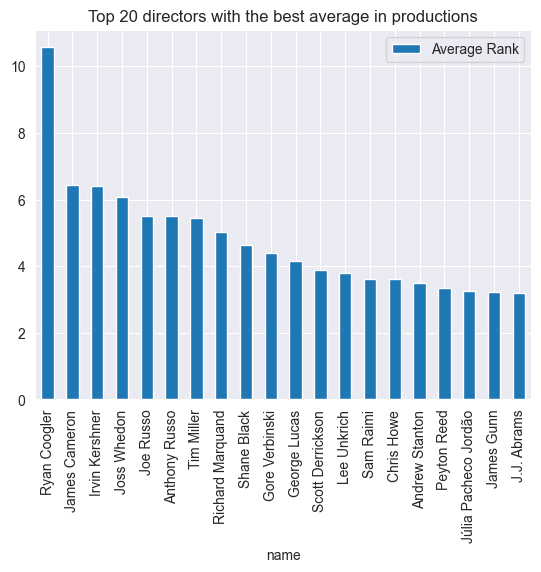

In [29]:
best_directors = df_disney_expanded.merge(df_directors, on='id', how='left')
best_directors = best_directors.groupby('name')['Rank_ponderated'].mean().reset_index()
best_directors_df = best_directors.rename(columns={'Rank_ponderated': 'Average Rank'}).sort_values('Average Rank', ascending = False).reset_index(drop= True)
best_directors_df
best_directors_df.head(20).plot(kind='bar', x='name', y='Average Rank', title='Top 20 directors with the best average in productions')


Los géneros involucrados en lass 200 mejores producciones vs. directores involucrados en las 200 últimas producciones

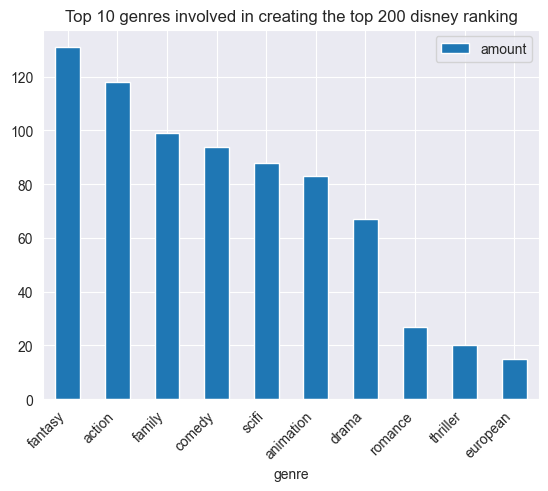

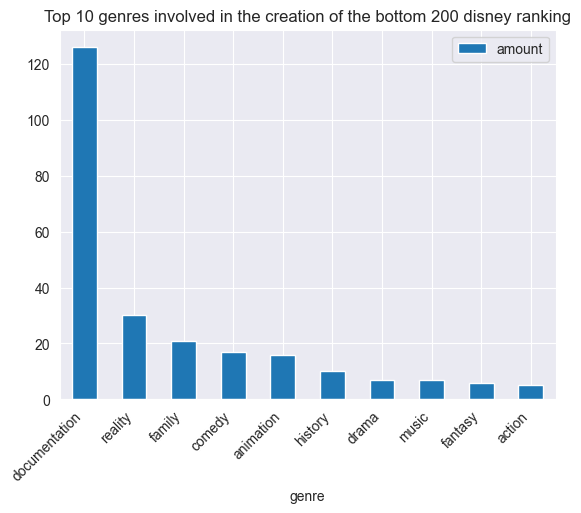

In [30]:
muestra_top = df_disney_expanded.head(200)
muestra_top = muestra_top[['id']]
muestra_top = muestra_top.merge(df_genres, on='id', how='left')

top_director = (
    muestra_top.groupby('genre').title.count()
        .reset_index(name='amount')
        .sort_values('amount', ascending = False)
        .head(10)
)

muestra_bottom = (
    df_disney_expanded
        .sort_values('Rank_Number', ascending = False)
        .head(200)
)
muestra_bottom = muestra_bottom[['id']]
muestra_bottom = muestra_bottom.merge(df_genres, on='id', how='left')
bottom_studios = (
    muestra_bottom.groupby('genre').title.count()
        .reset_index(name='amount')
        .sort_values('amount', ascending = False)
        .head(10)
)


top_director.plot(kind = 'bar', x = 'genre', title='Top 10 genres involved in creating the top 200 disney ranking')
plt.xticks(rotation=45, ha='right')
bottom_studios.plot(kind = 'bar', x= 'genre', title='Top 10 genres involved in the creation of the bottom 200 disney ranking')
plt.xticks(rotation=45, ha='right')
plt.show()

Hay géneros, como el de acción que se encuentra en las películas más valoradas. Sin embargo el género familiar aparece tanto en las más valoradas como en las menos valoradas. Para tener una visión general se debería de hacer el promedio

<Axes: title={'center': 'Top 20 genres with the best average in productions'}, xlabel='genre'>

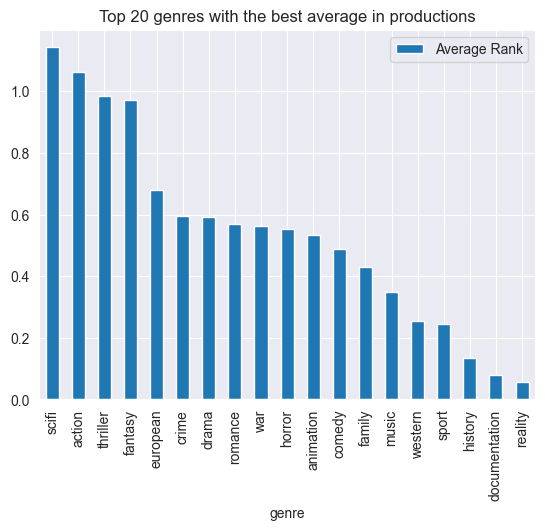

In [31]:
best_genres = df_genres.groupby('genre')['Rank_ponderated'].mean().reset_index()
best_genres_df = best_genres.rename(columns={'Rank_ponderated': 'Average Rank'}).sort_values('Average Rank', ascending = False).reset_index(drop= True)
best_genres_df
best_genres_df.head(20).plot(kind= 'bar', x= 'genre', y= 'Average Rank', title='Top 20 genres with the best average in productions')


Como podemos ver en el gráfico, los géneros con mayor puntuación son acción y ciencia ficción

In [32]:
#Hacemos un dataframe uniendo los directores y películas
df_directors = df_directors.merge(df_genres, on='id', how='left')

#Después los agrupamos por director y género
genre_count_by_director = df_directors.groupby(['name', 'genre']).size().reset_index(name='Count')

top_genres_by_director = genre_count_by_director.groupby('name').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

top_genres_by_director


,name,genre,Count
0,AJ Schnack,documentation,1
1,Aaron Blaise,action,1
2,Aaron Blaise,animation,1
3,Aaron Blaise,comedy,1
4,Aaron Pope,documentation,1
...,...,...,...
1998,Zach Parrish,drama,1
1999,Zach Parrish,family,1
2000,Zak Knutson,documentation,1
2001,Zak Knutson,history,1


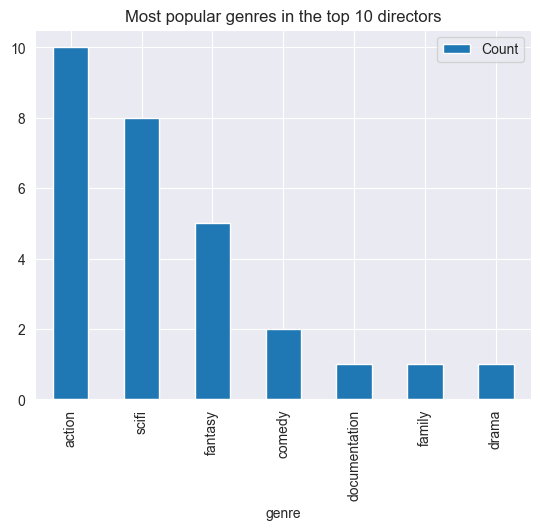

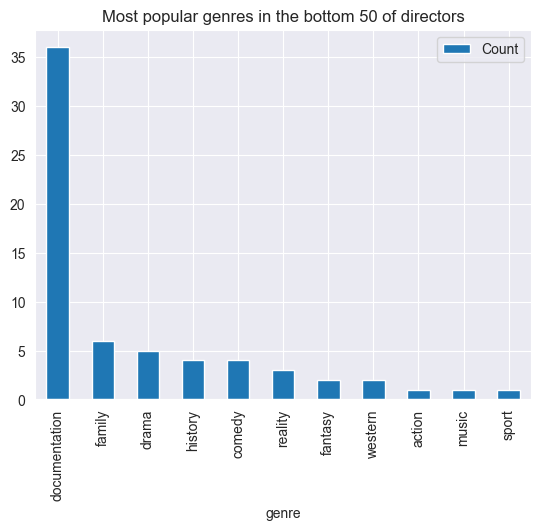

In [33]:
top_directors_productions = best_directors_df.head(10).loc[:, 'name'].tolist()
bottom_directors_productions = best_directors_df.sort_values('Average Rank', ascending = True).head(50).loc[:, 'name'].tolist()

top_gen_of_top = top_genres_by_director[top_genres_by_director['name'].isin(top_directors_productions)]
top_gen_of_bottom = top_genres_by_director[top_genres_by_director['name'].isin(bottom_directors_productions)]

top_to_graph = top_gen_of_top.groupby('genre')['Count'].count().reset_index().sort_values('Count',ascending = False)
bottom_to_graph = top_gen_of_bottom.groupby('genre')['Count'].count().reset_index().sort_values('Count',ascending = False)
top_to_graph.plot(kind='bar',x='genre', y= 'Count', title='Most popular genres in the top 10 directors')
bottom_to_graph.plot(kind='bar',x='genre', y= 'Count', title='Most popular genres in the bottom 50 of directors')
plt.show()

Al parecer los directores del top 10 dirigen mayoritariamente películas de acción, ciencia ficción y fantasía. Mientras que las producciónes del bottom 50 se enfocaron más en documentales, producciones familiares y drama.
Para finalizar, veremos la distribución de géneros en los animes.

In [34]:
df_disney_only = df_directors.drop_duplicates(subset='id', keep='first')
df_disney_only = df_disney_only.groupby(['title', 'Rank_ponderated', 'genre']).size().reset_index(name='Count')
df_disney_only = df_disney_only.sort_values('Rank_ponderated', ascending = False).reset_index(drop = True)
df_disney_only

,title,Rank_ponderated,genre,Count
0,Black Panther: Wakanda Forever,17.597513,action,1
1,Avatar,9.602945,action,1
2,The Simpsons Meet the Bocellis in Feliz Navidad,7.748615,comedy,1
3,Avengers: Infinity War,7.447580,action,1
4,The Avengers,7.434588,action,1
...,...,...,...,...
1252,Sharks vs. Dolphins: Blood Battle,0.000138,documentation,1
1253,The Magic Maker,0.000122,documentation,1
1254,Smoky Mountain Park Rangers,0.000095,documentation,1
1255,Genoa Bridge Disaster,0.000076,documentation,1


<Axes: title={'center': 'Distribution of genres in all disney data'}, xlabel='genre'>

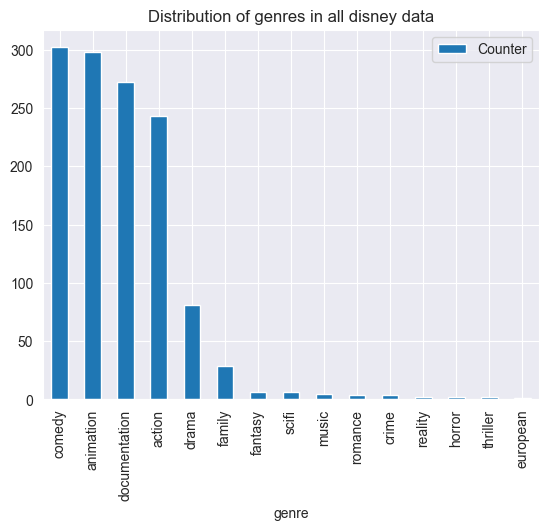

In [35]:
df_count_genre_anime = df_disney_only.groupby('genre')['Count'].count().reset_index(name ='Counter')
df_count_genre_anime = df_count_genre_anime.sort_values('Counter', ascending = False)
df_count_genre_anime.plot(kind='bar', x='genre', y = 'Counter', title= 'Distribution of genres in all disney data')

Es interesante saber que el género de comedia es el más frecuente en Disney, sin embargo no es el género que los estudios con mejor ranking hacen con frecuencia. Ahora por fin veremos los géneros de los 100 mejores animes del ranking para ver si tienen una similitud con los géneros en general

In [36]:
top_productions = df_disney_expanded.head(200)
top_productions = top_productions[['id']]
top_productions = top_productions.merge(df_genres, on='id', how='left')

<Axes: title={'center': 'Genre distribution in the top 200 productions'}, xlabel='genre'>

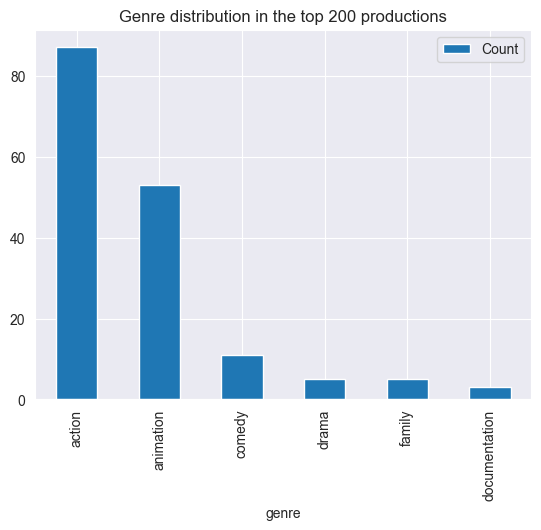

In [37]:
top_productions = top_productions.loc[:, 'title'].tolist()
top_productions
df_top_animes = df_disney_only[df_disney_only['title'].isin(top_productions)].drop('Count', axis=1)
df_top_animes_genre = df_top_animes.groupby('genre').size().reset_index(name='Count').sort_values('Count', ascending = False)
df_top_animes_genre.plot(kind = 'bar', x = 'genre', y = 'Count', title= 'Genre distribution in the top 200 productions')

Teniendo en cuenta el gráfico vemos como tienen cierta similitud en acción, animación, comedia y familiares. Pero tienen una diferencia considerable en cuanto a Comedia. Lo que pone de manifiesto que el top 200 no se centra tanto en la comedia como todo el conjunto de datos de Disney.

# ***Visualization***

 ***Disney Dataset***

In [38]:
# Group by release year and count the number of anime for each year
disney_cby = df_disney.groupby('release_year').size().reset_index(name='Disney_Count')

# Sort the result by anime count in descending order
k = disney_cby.sort_values(by='Disney_Count', ascending=False)

# Display the top 10 years with the highest number of anime
k.head(10)

,release_year,Disney_Count
91,2022,174
89,2020,143
90,2021,143
88,2019,112
85,2016,80
86,2017,79
87,2018,69
84,2015,67
79,2010,57
83,2014,56


**Número de producciones lanzadass por años**

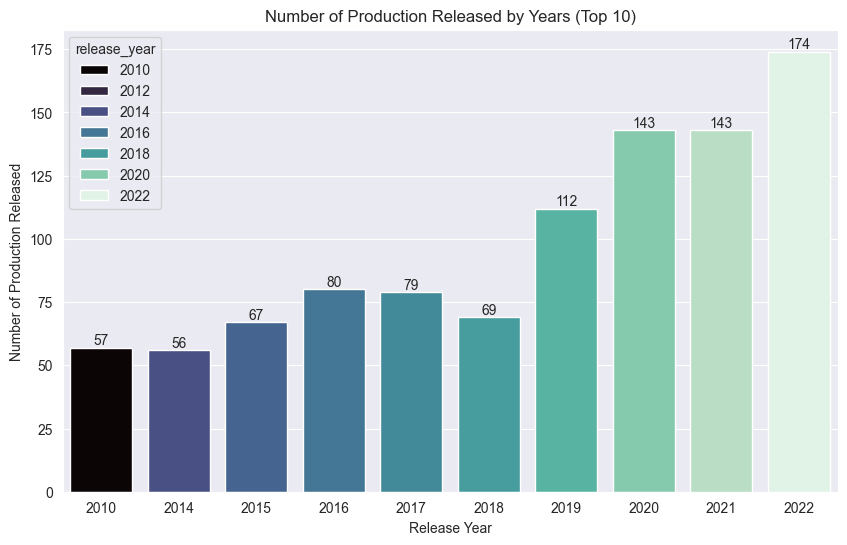

In [39]:
top_10 = k.head(10)
plt.figure(figsize=(10,6))
ax = sns.barplot(x='release_year', y='Disney_Count', hue='release_year', data=top_10, palette='mako')
for i in ax.containers:
    ax.bar_label(i)
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Production Released')
plt.title('Number of Production Released by Years (Top 10)')
plt.show()

**Las 10 producciones mejor valoradas**

In [40]:
name_score=df_disney[['title','Rank_ponderated']].sort_values(by='Rank_ponderated',ascending=False).head(10)
name_score['Rank_ponderated'] = name_score['Rank_ponderated'].apply(lambda x: round(x, 2))
name_score.head(10)

,title,Rank_ponderated
0,Black Panther: Wakanda Forever,17.60
1,The Mandalorian,16.78
2,Avatar,9.60
3,The Simpsons Meet the Bocellis in Feliz Navidad,7.75
4,Avengers: Infinity War,7.45
5,The Avengers,7.43
6,Star Wars,7.12
7,The Simpsons,6.49
8,The Empire Strikes Back,6.40
9,Avengers: Endgame,6.38


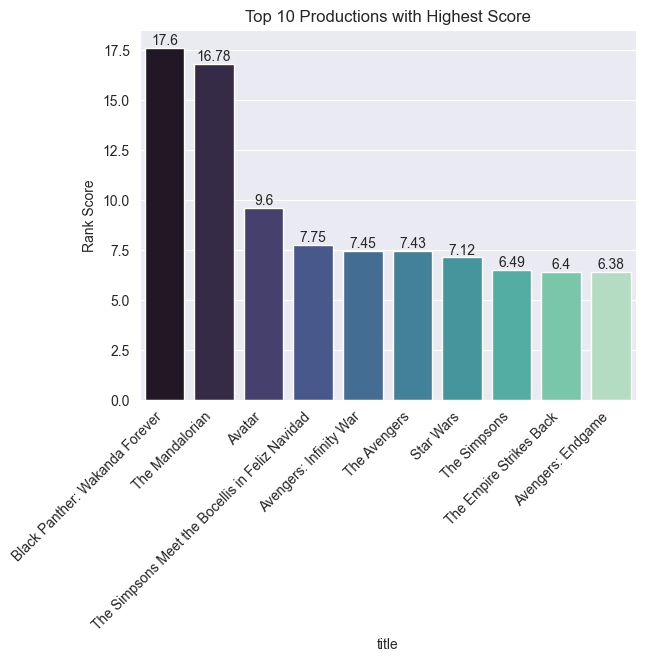

In [41]:
ax=sns.barplot(y='Rank_ponderated',x='title',hue='title',data=name_score,palette='mako')
ax.set_title('Top 10 Productions with Highest Score')
for i in ax.containers:
    ax.bar_label(i)
ax.set_xlabel('title')
ax.set_ylabel('Rank Score')
plt.xticks(rotation=45, ha='right')
ax.title.set_text('Top 10 Productions with Highest Score')
plt.show()

**Lass 10 producciones con peores calificaciones**

In [42]:
sns.set_style('whitegrid')
name_score=df_disney[['title','Rank_ponderated']].sort_values(by='Rank_ponderated',ascending=True).head(10)
name_score['Rank_ponderated'] = name_score['Rank_ponderated'].apply(lambda x: round(x, 5))
name_score.head(10)

,title,Rank_ponderated
1768,Awesome Animals,0.00004
1767,Great Shark Chow Down,0.00005
1766,Best in Bridal,0.00006
1765,Disney Junior Ready for Preschool,0.00007
1764,Genoa Bridge Disaster,0.00008
1763,Smoky Mountain Park Rangers,0.00010
1762,Me & Mickey,0.00011
1761,Special Agent Oso: Three Healthy Steps,0.00011
1760,The Magic Maker,0.00012
1759,Broken Karaoke,0.00013


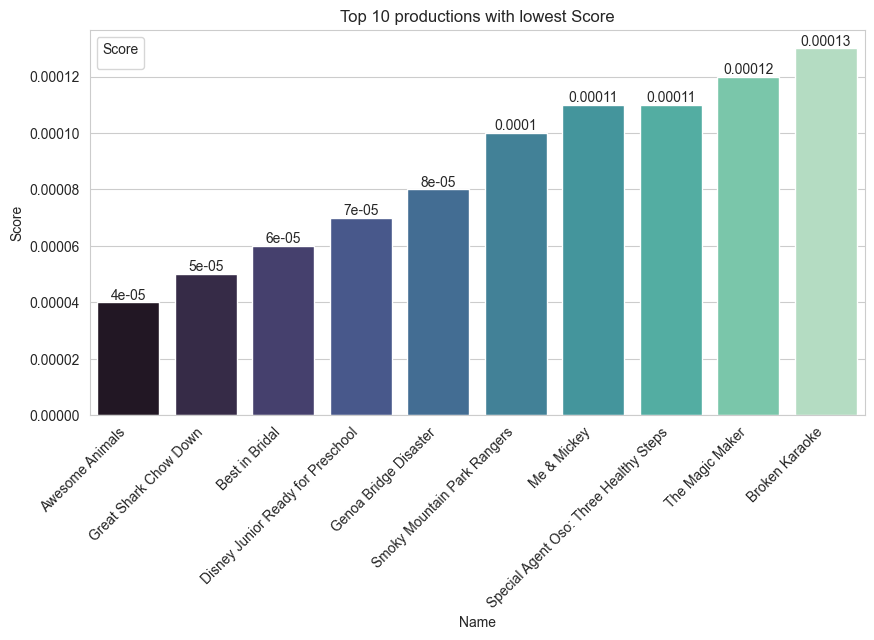

In [43]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
ax=sns.barplot(y='Rank_ponderated',x='title',hue='title',data=name_score,palette='mako')
ax.set_title('Top 10 productions with lowest  Score')
for i in ax.containers:
    ax.bar_label(i)
ax.set_xlabel('Name')
ax.set_ylabel('Score')
plt.xticks(rotation=90)
ax.title.set_text('Top 10 productions with lowest Score')
plt.legend(title='Score' ,loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

**Las 10 producciones más populares**

In [44]:
famous = df_disney[['title','imdb_votes','tmdb_popularity']]
famous['imdb_pop'] = famous['imdb_votes']/total_imdb_votes*100
famous['tmdb_pop'] = famous['tmdb_popularity']/total_tmdb_poularity*100

famous['popularity'] = np.where((famous['imdb_pop'].isna()),
                                famous['tmdb_pop'],
                                (famous['imdb_pop']+famous['tmdb_pop'])/2)

famous['popularity'] = np.where((famous['tmdb_pop'].isna()),
                                famous['imdb_pop'],
                                famous['popularity'])

famous['popularity'] = famous['popularity'].apply(lambda x: round(x, 2))

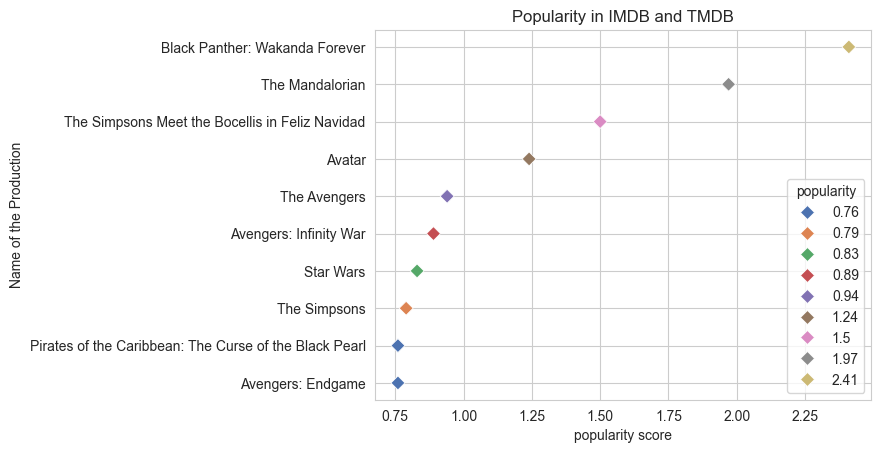

In [45]:
famous=famous[['popularity','title']].sort_values(by='popularity',ascending=False).head(10)
ax=sns.scatterplot(x='popularity',y='title',s=50,data=famous,marker='D',palette='deep',hue='popularity')
plt.xlabel('popularity score')
plt.ylabel('Name of the Production')
plt.title('Popularity in IMDB and TMDB')
plt.show()

**Recuento de nombres de producciones por tipo**

In [46]:
Type_Counts = df_disney['type'].value_counts()
Type_Counts.head(10)

type
MOVIE    1309
SHOW      536
Name: count, dtype: int64

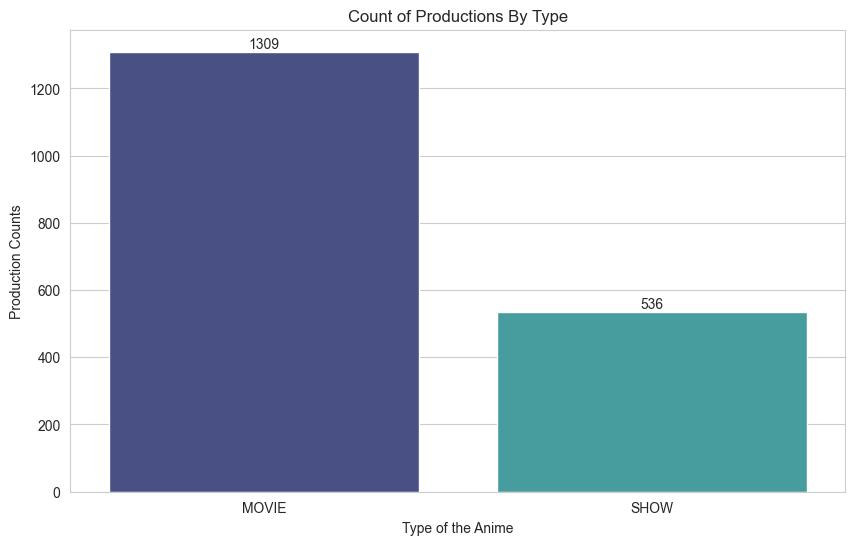

In [47]:
# Count the number of anime titles by type
Type_Counts = df_disney['type'].value_counts()

plt.figure(figsize=(10,6))
ax = sns.barplot(x=Type_Counts.index, y=Type_Counts.values, hue=Type_Counts.index, palette='mako')
for i in ax.containers:
    ax.bar_label(i)
ax.set_xlabel('Type of the Anime')
ax.set_ylabel('Production Counts')
plt.title('Count of Productions By Type')
plt.show()

**Los 15 mejores producciones según la base de datos de puntuación**

In [48]:
df_database = df_disney.copy()
# df_database['imdb_pop'] = df_database['imdb_votes']/total_imdb_votes*100
# df_database['tmdb_pop'] = df_database['tmdb_popularity']/total_tmdb_poularity*100
#
# df_database.drop(labels=['imdb_votes','tmdb_popularity'], axis=1, inplace=True)

df_database.drop(labels=['imdb_score','tmdb_score'], axis=1, inplace=True)

df_database = df_database.melt(id_vars=['id','title','type','description','release_year','age_certification','runtime','genres',
                                        'production_countries','seasons','imdb_id','Rank','Rank_ponderated','Rank_Number','imdb_votes','tmdb_popularity'], var_name='Database', value_name='Score')

df_database = df_database.melt(id_vars=['id','title','type','description','release_year','age_certification','runtime','genres',
                                        'production_countries','seasons','imdb_id','Rank','Rank_ponderated','Rank_Number','Database','Score'], var_name='Database2', value_name='votes/popularity')

df_database.drop(labels='Database2', axis=1, inplace=True)

# df_database['popularity'] = df_database['popularity'].apply(lambda x: round(x, 2))

df_database['Database'] = df_database['Database'].apply(lambda x: x.replace("_ponderated",""))

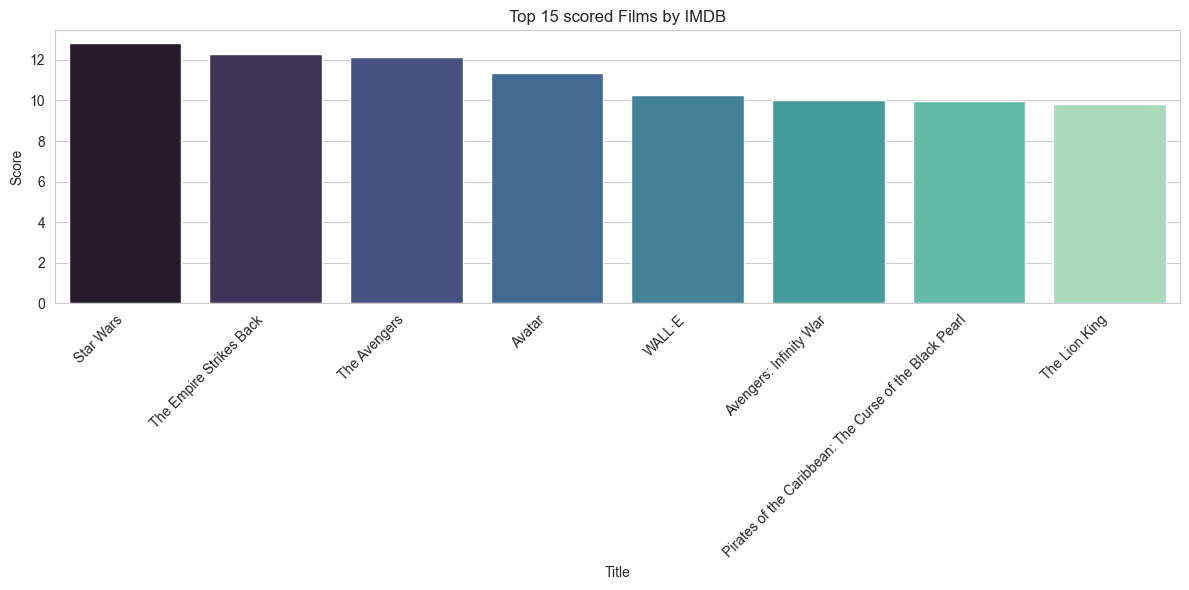

In [49]:
top_15_popular = df_database[df_database.Database == 'imdb']
top_15_popular = top_15_popular.sort_values(by='Score', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_15_popular, x='title', y='Score',hue='title', palette='mako')
plt.xlabel('Title')
plt.ylabel('Score')
plt.title('Top 15 scored Films by IMDB')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

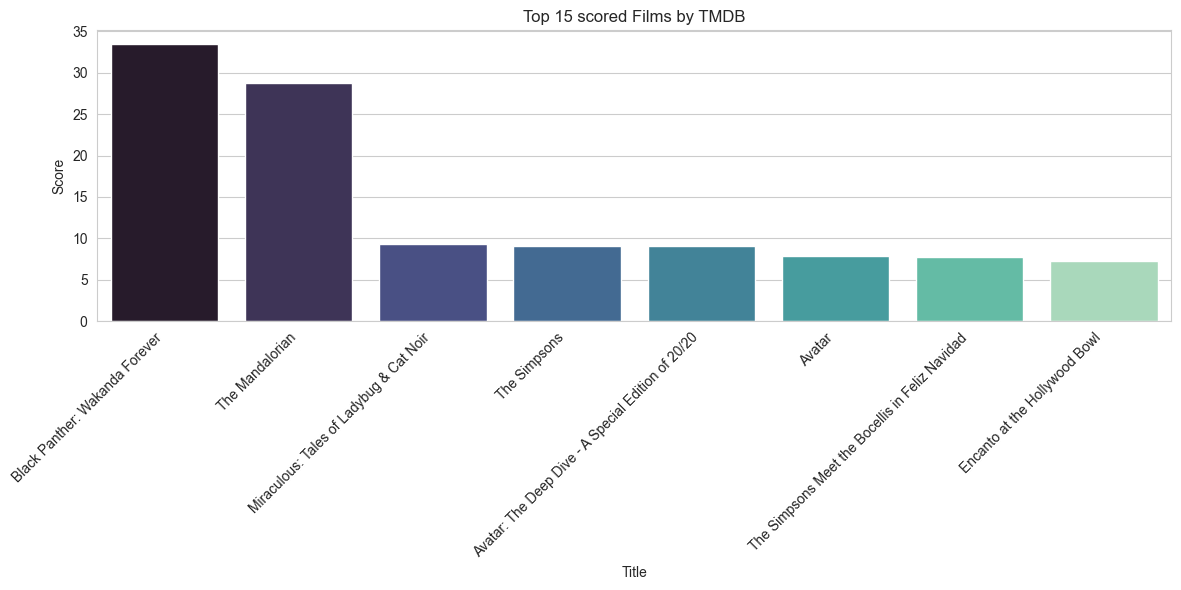

In [50]:
top_15_popular = df_database[df_database.Database == 'tmdb']
top_15_popular = top_15_popular.sort_values(by='Score', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_15_popular, x='title', y='Score',hue='title', palette='mako')
plt.xlabel('Title')
plt.ylabel('Score')
plt.title('Top 15 scored Films by TMDB')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Recuento de producciones por género**

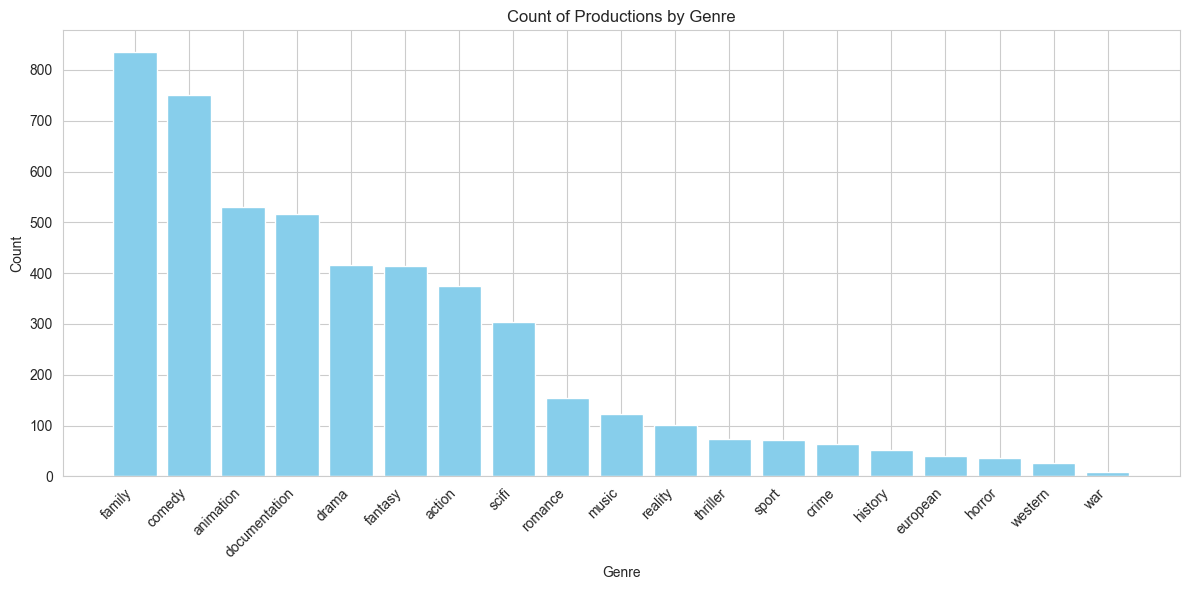

In [51]:
# Split the genres and count their occurrences
Genre_Counts = df_genres['genre'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(Genre_Counts.index, Genre_Counts.values, color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Productions by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Los 15 géneros más populares en Disney**

**Distribución de géneros de anime**

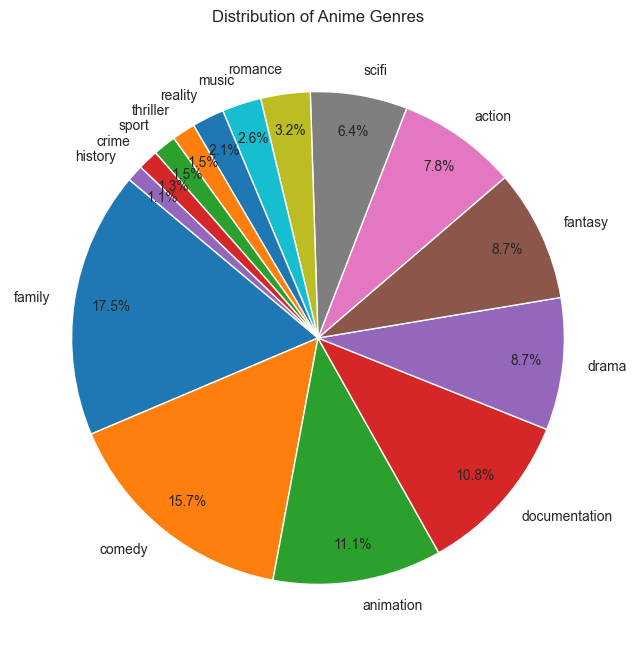

In [52]:
top_15_genres = Genre_Counts.head(15)
plt.figure(figsize=(8, 8))
plt.pie(top_15_genres.values, labels=top_15_genres.index, autopct='%1.1f%%', startangle=140,pctdistance=0.85)
plt.title('Distribution of Anime Genres')
plt.show()

**Los 10 principales directores en Disney**

In [53]:
df_directors['name'].value_counts()

name
Paul Hoen              65
Wilfred Jackson        54
Hamilton Luske         47
Clyde Geronimi         45
John Lasseter          44
                       ..
James Buchanan          1
Ann Marie Pace          1
Patrick Garney          1
Dick Rickard            1
William Pinkney III     1
Name: count, Length: 899, dtype: int64

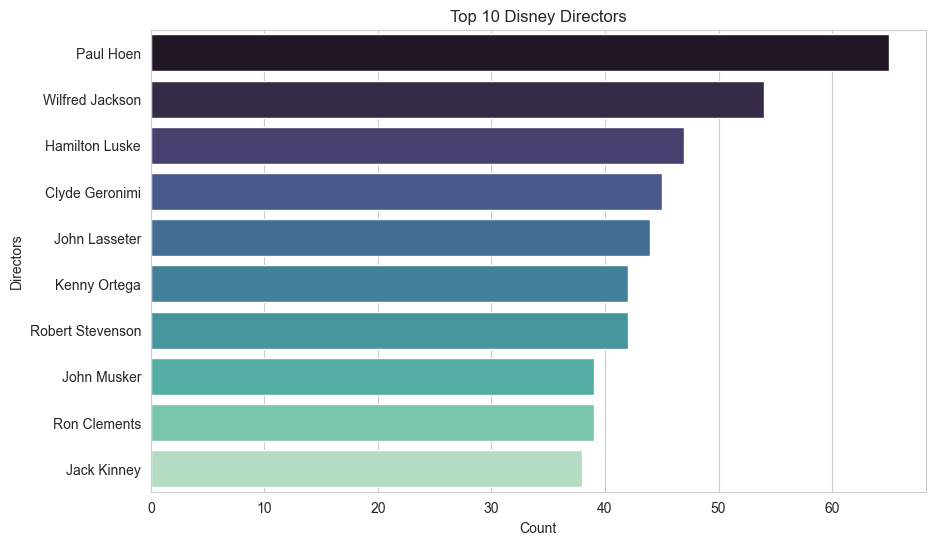

In [54]:
# Create a list of all the individual licensors
directors_list = [director for directors in df_directors['name'].str.split(',') for director in directors]

# Count the occurrences of each licensor
directors_counts = pd.Series(directors_list).value_counts()

# Filter the licensor_counts series to exclude 'Unknown'
filtered_director_counts = directors_counts[directors_counts.index != 'Unknown']

# Select the top 10 licensors
top_10_directors = filtered_director_counts.head(10)

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette='mako')
plt.title('Top 10 Disney Directors')
plt.xlabel('Count')
plt.ylabel('Directors')
plt.show()


**Recuento de animes según su idioma nativo**

In [55]:
df_disney_expanded.production_countries.unique()

array(['US', 'GB', 'FR', 'NZ', 'MX', 'BR', 'TR', 'CA', 'CN', 'JP', 'AR',
       'DE', 'PL', 'SI', 'CZ', 'BE', 'AU', 'CO', 'IN', 'IE', 'KR', 'SK',
       'PR', 'AT', 'DK', '', 'HK', 'ES', 'CH', 'MC', 'IT', 'ZA', 'PH',
       'CI', 'UG', 'TW', 'GT', 'KI', 'SE', 'NO', 'AE', 'BW', 'NL', 'CL',
       'GR'], dtype=object)

In [56]:
def map_country_code(code):
    language_mapping = {
        'US': 'United States',
        'GB': 'United Kingdom',
        'FR': 'France',
        'NZ': 'New Zealand',
        'MX': 'Mexico',
        'BR': 'Brazil',
        'TR': 'Turkey',
        'CA': 'Canada',
        'CN': 'China',
        'JP': 'Japan',
        'AR': 'Argentina',
        'DE': 'Germany',
        'PL': 'Poland',
        'SI': 'Slovenia',
        'CZ': 'Czech Republic',
        'BE': 'Belgium',
        'AU': 'Australia',
        'CO': 'Colombia',
        'IN': 'India',
        'IE': 'Ireland',
        'KR': 'South Korea',
        'SK': 'Slovakia',
        'PR': 'Puerto Rico',
        'AT': 'Austria',
        'DK': 'Denmark',
        'HK': 'Hong Kong',
        'ES': 'Spain',
        'CH': 'Switzerland',
        'MC': 'Monaco',
        'IT': 'Italy',
        'ZA': 'South Africa',
        'PH': 'Philippines',
        'CI': 'Ivory Coast',
        'UG': 'Uganda',
        'TW': 'Taiwan',
        'GT': 'Guatemala',
        'KI': 'Kiribati',
        'SE': 'Sweden',
        'NO': 'Norway',
        'AE': 'United Arab Emirates',
        'BW': 'Botswana',
        'NL': 'Netherlands',
        'CL': 'Chile',
        'GR': 'Greece'
    }
    return language_mapping.get(code, 'Other')



In [57]:
Detected_country = df_disney_expanded[df_disney_expanded['production_countries'] != '']['production_countries']

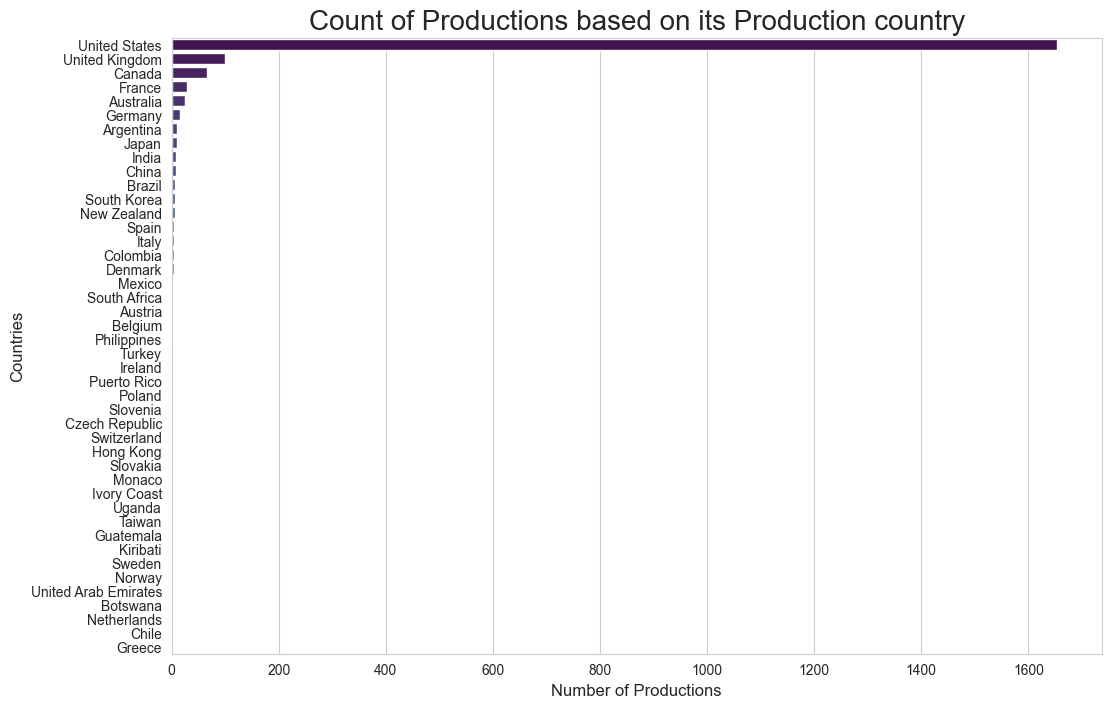

In [58]:
# Drop rows where language detection failed (i.e., where Detected_Language is None)
Detected_country = Detected_country.dropna()

# Count the occurrences of each language
country_counts = Detected_country.value_counts()

# Map abbreviated language codes to full names for plotting
country_counts.index = country_counts.index.map(map_country_code)

# Increase figure size
plt.figure(figsize=(12, 8))

# Plot horizontal bar chart
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')

# Set the title and axis labels
plt.title('Count of Productions based on its Production country', fontsize=20)
plt.xlabel('Number of Productions', fontsize=12)
plt.ylabel('Countries', fontsize=12)
plt.show()

**Observación de las puntuaciones de un director para determinados géneros**

In [59]:
df_directors_genre = df_credits[df_credits.role == 'DIRECTOR']
df_directors_genre.drop(labels=['role','character'], axis=1, inplace=True)
df_directors_genre = df_directors_genre.merge(df_disney_expanded, on='id', how='left')

In [60]:
# Function to get genres directed by specific name
def get_director_genres(director_name):
    director_data = df_directors_genre[df_directors_genre['name'] == director_name]
    if len(director_data) == 0:
        return None
    comedy = director_data['comedy'].values[0]
    family = director_data['animation'].values[0]
    fantasy = director_data['fantasy'].values[0]
    action = director_data['action'].values[0]
    drama = director_data['drama'].values[0]
    return comedy, family, fantasy, action, drama

In [61]:
# Get the input username from the director
director_input = "Paul Hoen"  # input("Enter the username: ")

comedy, family, fantasy, action, drama = get_director_genres(director_input)

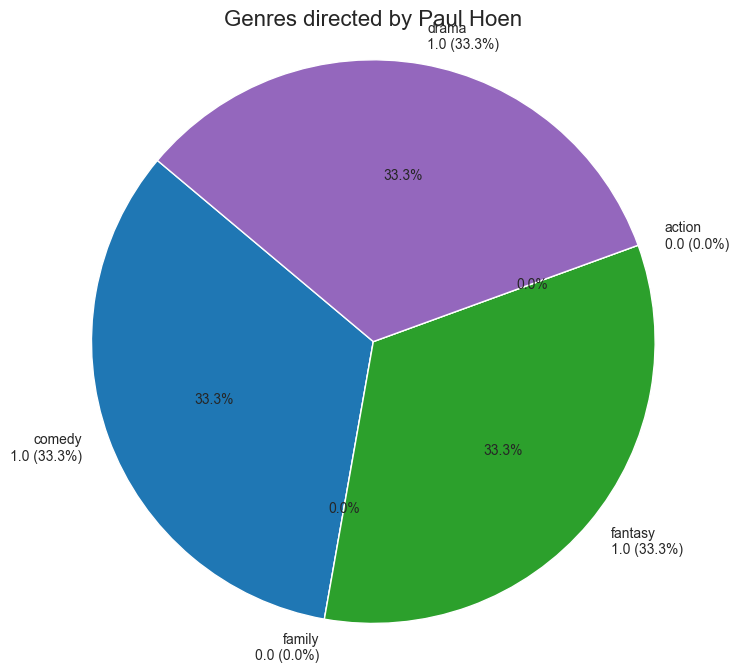

In [62]:
# Create data for the pie chart
labels = ['comedy','family','fantasy','action','drama']
sizes = [comedy, family, fantasy, action, drama]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Calculate percentages
total_count = sum(sizes)
percentages = [(size / total_count) * 100 for size in sizes]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=[f'{label}\n{size} ({percentage:.1f}%)' for label, size, percentage in zip(labels, sizes, percentages)],
        colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(f"Genres directed by {director_input}", fontsize=16)

# Show the plot
plt.axis('equal')
plt.show()


# ***Predicción de la puntuación según los géneros y los directores***

In [63]:
print("Shape of the Dataset:",df_directors_genre.shape)
df_directors_genre.head()

Shape of the Dataset: (1758, 40)


,person_id,id,name,title,type,description,release_year,age_certification,runtime,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Rank,imdb_ponderated,tmdb_ponderated,Rank_ponderated,Rank_Number,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western
0,44101,tm89464,George Seaton,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947.0,G,96.0,US,NaN,tt0039628,7.9,50969.0,23.515,7.388,7.6440,0.435537,0.366959,0.401248,364.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23438,tm61729,James Algar,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950.0,G,68.0,US,NaN,tt0041094,6.9,16502.0,16.194,6.500,6.7000,0.123162,0.222338,0.172750,649.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7712,tm61729,Clyde Geronimi,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950.0,G,68.0,US,NaN,tt0041094,6.9,16502.0,16.194,6.500,6.7000,0.123162,0.222338,0.172750,649.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25067,tm61729,Jack Kinney,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950.0,G,68.0,US,NaN,tt0041094,6.9,16502.0,16.194,6.500,6.7000,0.123162,0.222338,0.172750,649.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23446,tm61052,Wilfred Jackson,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950.0,G,74.0,US,NaN,tt0042332,7.3,164292.0,93.547,7.035,7.1675,1.297272,1.390079,1.343676,148.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Eliminamos aquellos registros con puntuación nula ya que no nos interesan

In [64]:
df_directors_genre.dropna(subset=['Rank_ponderated'], inplace=True)
print(f'Films left: {df_directors_genre.shape[0]}')

Films left: 1724


In [65]:
# Calculating the average score
avg_score = np.mean(df_directors_genre['Rank_ponderated'])
print('Average Score:', avg_score)

Average Score: 0.4976545542406133


In [66]:
# Extraer las columnas de géneros
genre_columns = ['action', 'animation', 'comedy', 'crime', 'documentation',
                 'drama', 'european', 'family', 'fantasy', 'history',
                 'horror', 'music', 'reality', 'romance', 'scifi',
                 'sport', 'thriller', 'war', 'western']

# Crear un vector de géneros
df_directors_genre['genres_vector'] = df_directors_genre[genre_columns].values.tolist()

In [67]:
g = df_directors_genre.groupby('person_id')['Rank_ponderated'].count()
top_directors = g.dropna().sort_values(ascending=False)[:20]
top_r = df_directors_genre.join(top_directors, rsuffix='_r', how='inner', on='person_id')

g = df_directors_genre.groupby('id')['Rank_ponderated'].count()
top_productions = g.dropna().sort_values(ascending=False)[:20]
top_r = top_r.join(top_productions, rsuffix='_r', how='inner', on='id')

pd.crosstab(top_r.person_id, top_r.id, top_r.Rank_ponderated, aggfunc=np.sum)

id,tm45440,tm4623,tm62353,tm74391,tm77407,tm82546,tm87946
person_id,,,,,,,
7712,NaN,0.149391,NaN,NaN,NaN,NaN,NaN
13776,NaN,NaN,NaN,0.751283,NaN,0.946512,0.92698
23438,NaN,NaN,0.272281,0.751283,NaN,NaN,NaN
23442,NaN,NaN,NaN,0.751283,0.13171,0.946512,NaN
23446,NaN,NaN,NaN,0.751283,0.13171,0.946512,0.92698
25067,NaN,0.149391,NaN,NaN,0.13171,0.946512,0.92698
35602,0.299161,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# Escalar nuestra columna de "calificación"
# Crear un objeto MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Escala la columna 'puntuación' entre 0 y 1
df_directors_genre['scaled_score'] = scaler.fit_transform(df_directors_genre[['Rank_ponderated']])

In [69]:
# Encoding categorical data

## Encoding user IDs
director_encoder = LabelEncoder()
df_directors_genre["director_encoded"] = director_encoder.fit_transform(df_directors_genre["person_id"])
num_directors = len(director_encoder.classes_)

## Encoding anime IDs
productions_encoder = LabelEncoder()
df_directors_genre["production_encoded"] = productions_encoder.fit_transform(df_directors_genre["id"])
num_animes = len(productions_encoder.classes_)

# Printing dataset information
print("Number of unique directors: {}, Number of unique production: {}".format(num_directors, num_animes))
print("Minimum rating: {}, Maximum rating: {}".format(min(df_directors_genre['Rank_ponderated']), max(df_directors_genre['Rank_ponderated'])))

Number of unique directors: 878, Number of unique production: 1266
Minimum rating: 4.932380150869178e-05, Maximum rating: 17.597512583839695


In [70]:
df_directors_genre

,person_id,id,name,title,type,description,release_year,age_certification,runtime,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Rank,imdb_ponderated,tmdb_ponderated,Rank_ponderated,Rank_Number,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western,genres_vector,scaled_score,director_encoded,production_encoded
0,44101,tm89464,George Seaton,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947.0,G,96.0,US,NaN,tt0039628,7.9,50969.0,23.515,7.388,7.6440,0.435537,0.366959,0.401248,364.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...",0.022799,328,1100
1,23438,tm61729,James Algar,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950.0,G,68.0,US,NaN,tt0041094,6.9,16502.0,16.194,6.500,6.7000,0.123162,0.222338,0.172750,649.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...",0.009814,215,918
2,7712,tm61729,Clyde Geronimi,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950.0,G,68.0,US,NaN,tt0041094,6.9,16502.0,16.194,6.500,6.7000,0.123162,0.222338,0.172750,649.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...",0.009814,99,918
3,25067,tm61729,Jack Kinney,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950.0,G,68.0,US,NaN,tt0041094,6.9,16502.0,16.194,6.500,6.7000,0.123162,0.222338,0.172750,649.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...",0.009814,236,918
4,23446,tm61052,Wilfred Jackson,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950.0,G,74.0,US,NaN,tt0042332,7.3,164292.0,93.547,7.035,7.1675,1.297272,1.390079,1.343676,148.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...",0.076353,222,914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751,2389865,tm1304158,Tine,Soul of a Nation Presents: Black in Vegas,MOVIE,This special explores the history of Black ent...,2023.0,PG-13,41.0,US,NaN,NaN,NaN,NaN,2.954,2.000,2.0000,NaN,0.012479,0.012479,1609.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0.000706,861,290
1752,266810,tm24952,Dereck Joubert,Whispers: An Elephant's Tale,MOVIE,A nameless baby elephant-steer was just gettin...,2023.0,G,72.0,US,NaN,tt0185007,5.0,390.0,4.271,4.600,4.8000,0.002109,0.041499,0.021804,1461.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...",0.001236,599,634
1753,807095,tm1314337,Brendan Walter,Miley Cyrus – Endless Summer Vacation (Backyar...,MOVIE,"Miley Cyrus takes the stage in this must-see, ...",2023.0,PG-13,42.0,US,NaN,tt27001634,NaN,NaN,10.543,10.000,10.0000,NaN,0.222695,0.222695,548.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0.012652,719,301
1754,2763559,tm1314337,Jacob Bixenman,Miley Cyrus – Endless Summer Vacation (Backyar...,MOVIE,"Miley Cyrus takes the stage in this must-see, ...",2023.0,PG-13,42.0,US,NaN,tt27001634,NaN,NaN,10.543,10.000,10.0000,NaN,0.222695,0.222695,548.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0.012652,877,301


In [71]:
# Shuffle the dataset
df_encoded = shuffle(df_directors_genre, random_state=100)

# Create feature matrix X and target variable y
X = df_encoded[['director_encoded', 'production_encoded']].values
genres = np.array(df_encoded['genres_vector'].to_list())
X = np.hstack([X, genres])  # Concatenar géneros a la matriz de entrada

y = df_encoded['scaled_score'].values

# Printing dataset information
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1724, 21)
Shape of y: (1724,)


In [72]:
test_set_size = 200  # Number of samples to include in the test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_set_size, random_state=73)

print("Number of samples in the training set:", len(y_train))
print("Number of samples in the test set:", len(y_test))


Number of samples in the training set: 1524
Number of samples in the test set: 200


In [73]:
# Prepare input data for model training and evaluation
genres_train = X_train[:, 2:]
genres_test = X_test[:, 2:]
X_train_array = [X_train[:, 0], X_train[:, 1], genres_train]
X_test_array = [X_test[:, 0], X_test[:, 1], genres_test]

In [74]:
# Setting TPU_INIT flag
USE_TPU = False

# Checking if TPU is initialized
if USE_TPU:
    try:
        # Initialize TPU
        tpu_resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
        tf.config.experimental_connect_to_cluster(tpu_resolver)
        tf.tpu.experimental.initialize_tpu_system(tpu_resolver)
        tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu_resolver)
        print('TPU initialized')
    except ValueError as e:
        print(f"Failed to initialize TPU: {e}")
else:
    # For GPU check
    !nvidia-smi

# Print the TensorFlow version
tf_version = tf.__version__
print(f"TensorFlow version: {tf_version}")


Sat Dec 21 19:36:28 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.36                 Driver Version: 566.36         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   48C    P0             23W /  165W |     942MiB /  12282MiB |     34%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [75]:
def RecommenderNet(num_directors, num_productions, num_genres, embedding_size=128):
    # Entrada del director
    director = Input(name='director_encoded', shape=[1])
    director_embedding = Embedding(name='director_embedding', input_dim=num_directors, output_dim=embedding_size)(director)
    director_embedding = Flatten()(director_embedding)

    # Entrada de producción
    production = Input(name='production_encoded', shape=[1])
    production_embedding = Embedding(name='production_embedding', input_dim=num_productions, output_dim=embedding_size)(production)
    production_embedding = Flatten()(production_embedding)

    # Entrada de géneros
    genres = Input(name='genres_vector', shape=[num_genres])
    genres_dense = Dense(64, activation='relu')(genres)

    # Concatenar las entradas
    concatenated = Concatenate()([director_embedding, production_embedding, genres_dense])

    # Capas densas
    dense = Dense(128, activation='relu')(concatenated)
    dense = Dense(64, activation='relu')(dense)
    output = Dense(1, activation='linear')(dense)

    # Crear el modelo
    model = Model(inputs=[director, production, genres], outputs=output)
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])


    return model
# Checking if TPU is initialized and create the model accordingly
if USE_TPU:
    with tpu_strategy.scope():
        num_genres = len(genre_columns)
        model = RecommenderNet(num_directors, num_animes, num_genres)
else:
    num_genres = len(genre_columns)
    model = RecommenderNet(num_directors, num_animes, num_genres)
# Printing my model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ director_encoded    │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ production_encoded  │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ director_embedding  │ (None, 1, 128)    │    112,384 │ director_encoded… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ production_embeddi… │ (None, 1, 128)    │    162,048 │ production_encod… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ genres_vector       │ (None, 19)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 128)       │          0 │ director_embeddi… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 128)       │          0 │ production_embed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      1,280 │ genres_vector[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 320)       │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     41,088 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         65 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 325,121 (1.24 MB)

 Trainable params: 325,121 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
## Import necessary callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping

# Define the initial learning rate, minimum learning rate, maximum learning rate, and batch size
start_lr = 0.001
min_lr = 0.001
max_lr = 0.005
batch_size = 10000

# Adjust the maximum learning rate and batch size if using TPU
if USE_TPU:
    max_lr = max_lr * tpu_strategy.num_replicas_in_sync
    batch_size = batch_size * tpu_strategy.num_replicas_in_sync

# Define the number of epochs for ramp-up, sustain, and exponential decay
rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

# Learning rate schedule function
def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr) / rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch - rampup_epochs - sustain_epochs) + min_lr

# Learning rate scheduler callback
lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

# File path for saving the model weights
checkpoint_filepath = 'mydisneyweights.weights.h5'

# Model checkpoint callback to save the best weights
model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                    save_weights_only=True,
                                    monitor='val_loss',
                                    mode='min',
                                    save_best_only=True)
# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(patience=3, monitor='val_loss', mode='min', restore_best_weights=True)

# Define the list of callbacks
my_callbacks = [
    model_checkpoints,
    lr_callback,
    early_stopping
]

In [77]:
# Model training
history = model.fit(
    x=[X_train[:, 0], X_train[:, 1], genres_train],
    y=y_train,
    batch_size=batch_size,
    epochs=20,
    verbose=1,
    validation_data=([X_test[:, 0], X_test[:, 1], genres_test], y_test),
    callbacks=my_callbacks
)

model.load_weights(checkpoint_filepath)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0108 - mae: 0.0741 - val_loss: 0.0071 - val_mae: 0.0466 - learning_rate: 0.0010
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0049 - mae: 0.0381 - val_loss: 0.0075 - val_mae: 0.0717 - learning_rate: 0.0018
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0078 - mae: 0.0755 - val_loss: 0.0064 - val_mae: 0.0663 - learning_rate: 0.0026
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0061 - mae: 0.0666 - val_loss: 0.0039 - val_mae: 0.0367 - learning_rate: 0.0034
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0022 - mae: 0.0271 - val_loss: 0.0044 - val_mae: 0.0373 - learning_rate: 0.0042
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0026 - mae: 0.0326 - val_loss: 0.0048 - val_mae: 0.0439 - learning_rate: 0.0050
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0032 - mae: 0.0419 - val_loss: 0.0038 - val_mae: 0.0347 - learning_rate: 0.0042
Epoch 8/20
1/1 ━━━━━━━━━━━━━━

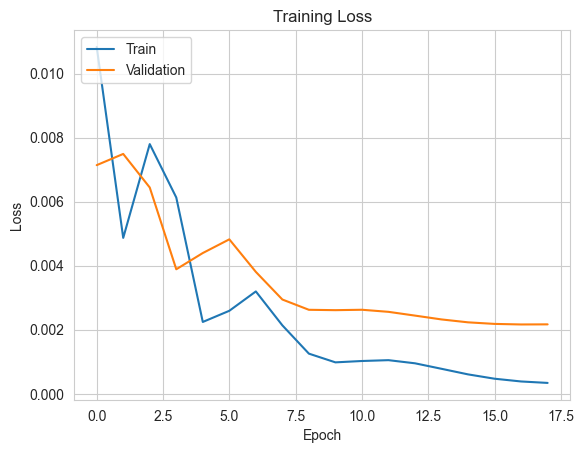

In [78]:
# Visualización de resultados de entrenamiento
plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("Training Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [79]:
loss, mae = model.evaluate([X_test[:, 0], X_test[:, 1], genres_test], y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020 - mae: 0.0256 
Test Loss: 0.002260289853438735, Test MAE: 0.027174077928066254


Como podemos observar, la pérdida de los datos de entrenamiento y validación disminuye a medida que aumentan las épocas. En el caso de la pérdida de los datos de validación, muestra un patrón estable a partíd de las épocas 5-6.
La pérdida de validación no aumenta a medida que se añaden épocas, por lo tanto no se puede observar que se esté produciendo un sobreajuste. Por lo tanto este modelo parece extrapolable a nuevos modelos
Además los errores promedio de entrenamiento y prueba no superan el 0,03. Además es muy similar en los datos de entrenamiento y prueba, lo que hace que nuevamente descartemos el sobreajuste

In [79]:
model.save("recommender_net_with_genres.h5")

Una breve muestra de como precice el modelo las puntuaciones

In [80]:
# Predicción sobre el conjunto de prueba
predictions = model.predict([X_test[:, 0], X_test[:, 1], genres_test])

# Mostrar algunas predicciones
for i in range(5):
    print(f"Predicción: {predictions[i]}, Real: {y_test[i]}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Predicción: [0.01030818], Real: 0.0011398478364122932
Predicción: [0.00985906], Real: 0.007816547224883992
Predicción: [0.01389932], Real: 0.009280328904323435
Predicción: [0.05264942], Real: 0.05803134446809387
Predicción: [0.00346006], Real: 0.00035050198010153587


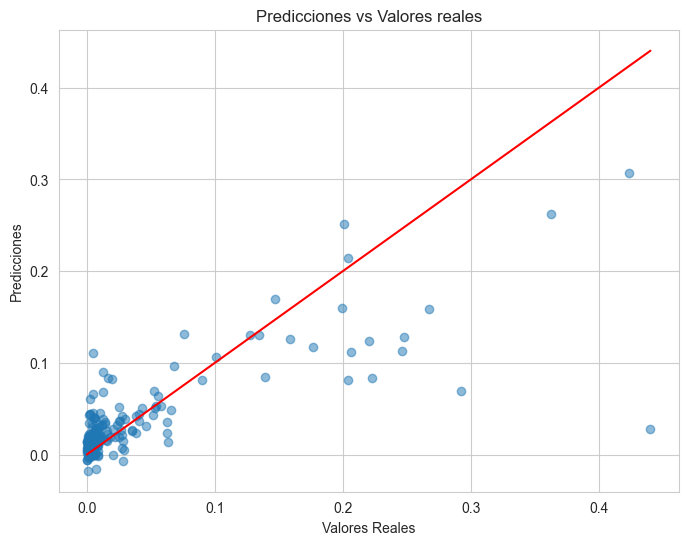

In [81]:
# Comparar predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Línea ideal
plt.title('Predicciones vs Valores reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()